<a href="https://colab.research.google.com/github/NeelSagar39/Covid-19_analysis/blob/main/Experiment-1(time-series).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data sampling interval is 86400 secs


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


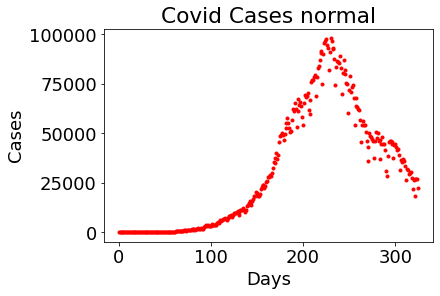

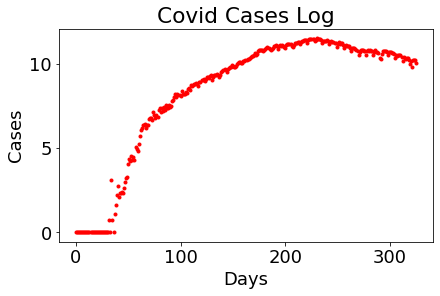

In [2]:
import pandas as pd
import numpy as np
import math, sys
import matplotlib.pyplot as plt
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
df = pd.read_csv('case_time_series.csv', usecols = [1,2], parse_dates=[1])
t=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
dt = t[1] - t[0]
print('data sampling interval is %d secs'%dt)
t=(t-t[0])/60/60/24 
y = np.log(df.iloc[:,1].astype(np.int64))
y_antilog = df.iloc[:,1].astype(np.int64)
from numpy import inf
y[y == -inf] = 0

plt.scatter(t,y_antilog, color='red', marker='.')
plt.title('Covid Cases normal')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.show()
plt.scatter(t,y, color='red', marker='.')
plt.title('Covid Cases Log')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.show()

326 10 3 1
0.4788976695497042
0.0 [-0.24957093  0.24812391  1.02072332]


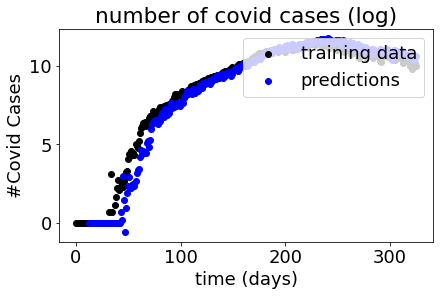

326 1 3 1
0.044646086037898235
0.0 [0.14334253 0.31846687 0.54218803]


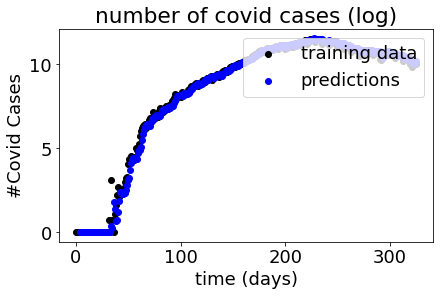

326 7 3 7
0.23990136056860253
0.0 [-7.27978821e-01 -1.40972214e-03  1.72784970e+00]


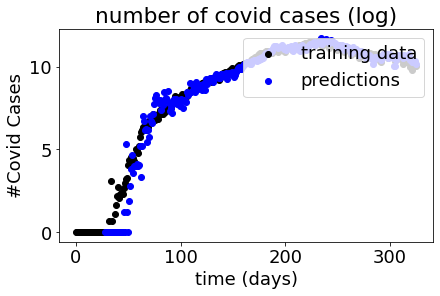

In [19]:
def test_preds(q,dd,lag,plot):
  stride=1
  XX=y[0:y.size-q-lag*dd:stride]
  print(y.size,q,lag,dd)
  for i in range(1,lag):
    X=y[i*dd:y.size-q-(lag-i)*dd:stride]
    XX=np.column_stack((XX,X))
  yy=y[lag*dd+q::stride]
  tt=t[lag*dd+q::stride]
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import mean_squared_error
  XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2)
  from sklearn.linear_model import Ridge
  model = Ridge(fit_intercept=False).fit(XX_train, yy_train)
  y_test = model.predict(XX_test)
  print(mean_squared_error(yy_test,y_test))
  print(model.intercept_, model.coef_)
  if plot:
    y_pred = model.predict(XX)
    plt.scatter(t, y, color='black')
    plt.scatter(tt,y_pred, color='blue')
    plt.xlabel('time (days)'); plt.ylabel('#Covid Cases')
    plt.legend(['training data','predictions'],loc='upper right')
    plt.title('number of covid cases (log)')
    plt.show()


plot=True
# prediction 10 steps
test_preds(q=10,dd=1,lag=3,plot=plot)
# prediction using daily seasonality
d=math.floor(24*60*60/dt)
test_preds(q=d,dd=d,lag=3,plot=plot)
# prediction using weekly seasonality
w=math.floor(7*24*60*60/dt) 
test_preds(q=w,dd=w,lag=3,plot=plot)




326 1 3 1
0.041305474123777816
0.0 [0.09064799 0.34123489 0.57287575]


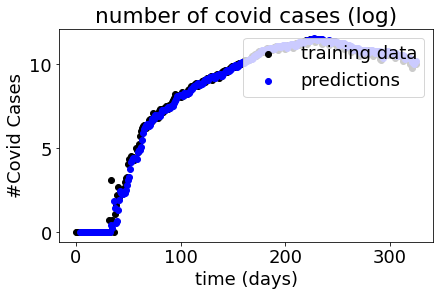

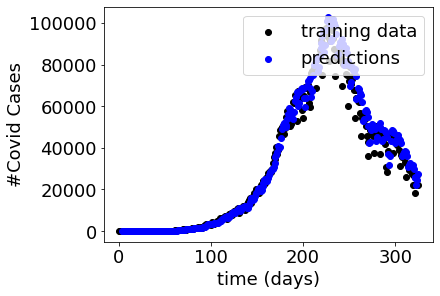

In [32]:
#putting it together
def final_function(q,dd,lag,plot):
  stride=1
  XX=y[0:y.size-q-lag*dd:stride]
  print(y.size,q,lag,dd)
  for i in range(1,lag):
    X=y[i*dd:y.size-q-(lag-i)*dd:stride]
    XX=np.column_stack((XX,X))
  yy=y[lag*dd+q::stride]
  tt=t[lag*dd+q::stride]
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import mean_squared_error
  XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2)
  from sklearn.linear_model import Ridge
  model = Ridge(fit_intercept=False).fit(XX_train, yy_train)
  y_test = model.predict(XX_test)
  print(mean_squared_error(yy_test,y_test))
  print(model.intercept_, model.coef_)
  if plot:
    y_pred = model.predict(XX)
    plt.scatter(t, y, color='black')
    plt.scatter(tt,y_pred, color='blue')
    plt.xlabel('time (days)'); plt.ylabel('#Covid Cases')
    plt.legend(['training data','predictions'],loc='upper right')
    plt.title('number of covid cases (log)')
    plt.show()
  if plot:
    y_pred_normal = np.exp(model.predict(XX))
    plt.scatter(t, np.exp(y), color='black'); plt.scatter(tt, y_pred_normal, color='blue')
    plt.xlabel('time (days)'); plt.ylabel('#Covid Cases')
    plt.legend(['training data','predictions'],loc='upper right')
    day=math.floor(24*60*60/dt) # number of samples per day
    #plt.xlim((30,200))
    plt.show()
  return XX_train, XX_test, yy_train, yy_test, XX, yy, tt, t, model
d=math.floor(24*60*60/dt)
XX_train, XX_test, yy_train, yy_test, XX, yy, tt, t, Ridge_model = final_function(q=d,dd=d,lag=3,plot=plot)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.321130974570863, tolerance: 2.120390385863171
  positive)


0.0 [0.36798982 0.33159197 0.29338825]
0.09365301039376359


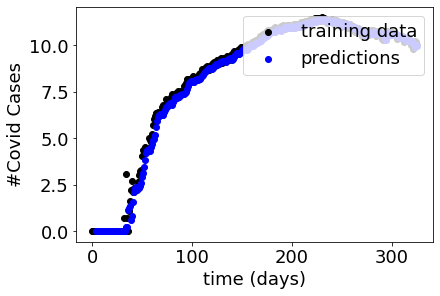

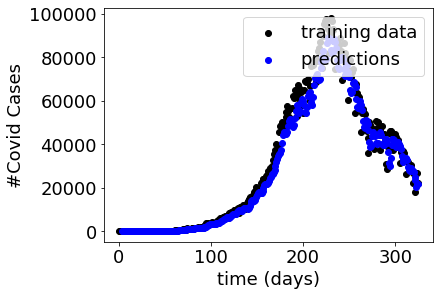

In [29]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
model_1 = Lasso(fit_intercept=False).fit(XX_train, yy_train)
print(model_1.intercept_, model_1.coef_)
y_pred_lasso = model_1.predict(XX_test)
print(mean_squared_error(yy_test,y_pred_lasso))
if plot:
  y_pred_lasso_final = model_1.predict(XX)
  plt.scatter(t, y, color='black'); plt.scatter(tt, y_pred_lasso_final, color='blue')
  plt.xlabel('time (days)'); plt.ylabel('#Covid Cases')
  plt.legend(['training data','predictions'],loc='upper right')
  day=math.floor(24*60*60/dt) # number of samples per day
  #plt.xlim((30,200))
  plt.show()
  plot_1 = True
if plot_1:
  y_pred_normal = np.exp(model_1.predict(XX))
  plt.scatter(t, np.exp(y), color='black'); plt.scatter(tt, y_pred_normal, color='blue')
  plt.xlabel('time (days)'); plt.ylabel('#Covid Cases')
  plt.legend(['training data','predictions'],loc='upper right')
  day=math.floor(24*60*60/dt) # number of samples per day
  #plt.xlim((30,200))
  plt.show()

0.0 [-0.01350668  0.54000606  0.47841567]
0.07090908371185767


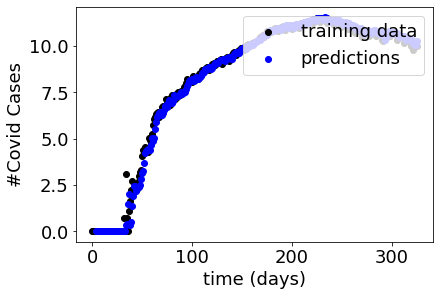

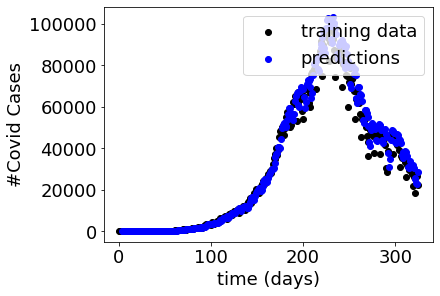

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model_linear = LinearRegression(fit_intercept=False).fit(XX_train, yy_train)
print(model_linear.intercept_, model_linear.coef_)
y_pred_Linear = model_linear.predict(XX_test)
mse_linear = mean_squared_error(yy_test,y_pred_Linear)
print(mse_linear)
if plot:
  y_pred_linear_final = model_linear.predict(XX)
  plt.scatter(t, y, color='black'); plt.scatter(tt, y_pred_linear_final, color='blue')
  plt.xlabel('time (days)'); plt.ylabel('#Covid Cases')
  plt.legend(['training data','predictions'],loc='upper right')
  day=math.floor(24*60*60/dt) # number of samples per day
  #plt.xlim((30,200))
  plt.show()
  plot_1 = True
if plot_1:
  y_pred_normal = np.exp(model_linear.predict(XX))
  plt.scatter(t, np.exp(y), color='black'); plt.scatter(tt, y_pred_normal, color='blue')
  plt.xlabel('time (days)'); plt.ylabel('#Covid Cases')
  plt.legend(['training data','predictions'],loc='upper right')
  day=math.floor(24*60*60/dt) # number of samples per day
  #plt.xlim((30,200))
  plt.show()

In [33]:
###predicting for next 10 days
X_test = [[25152,22890,24010]]
X_test = np.log(X_test)
y_predict= Ridge_model.predict(X_test)
print("Expected covid case on 19th December:", int(np.exp(y_predict)[0]))
print("Actual covid case on 19th December: 26624")

Expected covid case on 19th December: 24887
Actual covid case on 19th December: 26624
